<h3>Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import datasets
import datetime
%matplotlib inline

In [2]:
#loading data
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
data_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
#summary
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


<AxesSubplot:>

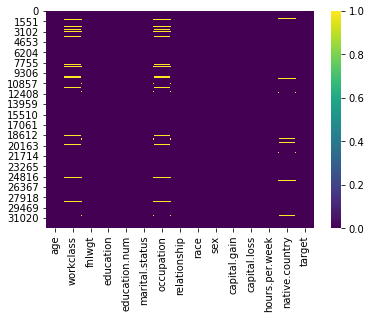

In [4]:
sns.heatmap(data_train.isnull(),cmap='viridis')
plt.title('Missing data')

In [5]:
mis_val=pd.DataFrame(data_train.isnull().sum())
mis_val

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [6]:
mis_val_=pd.DataFrame(data_test.isnull().sum())
mis_val_

,0
age,0
workclass,963
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,966
relationship,0
race,0
sex,0


In [7]:
#Replacing missing values with mode
for df in [data_train,data_test]:
    df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
    df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
    df['native.country'].fillna(df['native.country'].mode()[0], inplace=True)
data_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

<AxesSubplot:>

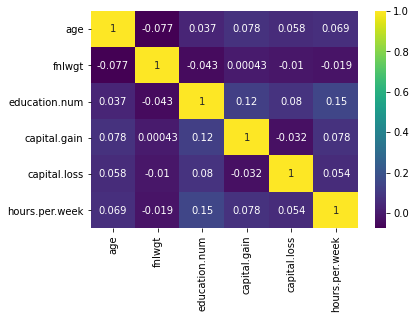

In [8]:
c=data_train.corr()
sns.heatmap(c,cmap='viridis',annot=True)

No strong correlation between variables

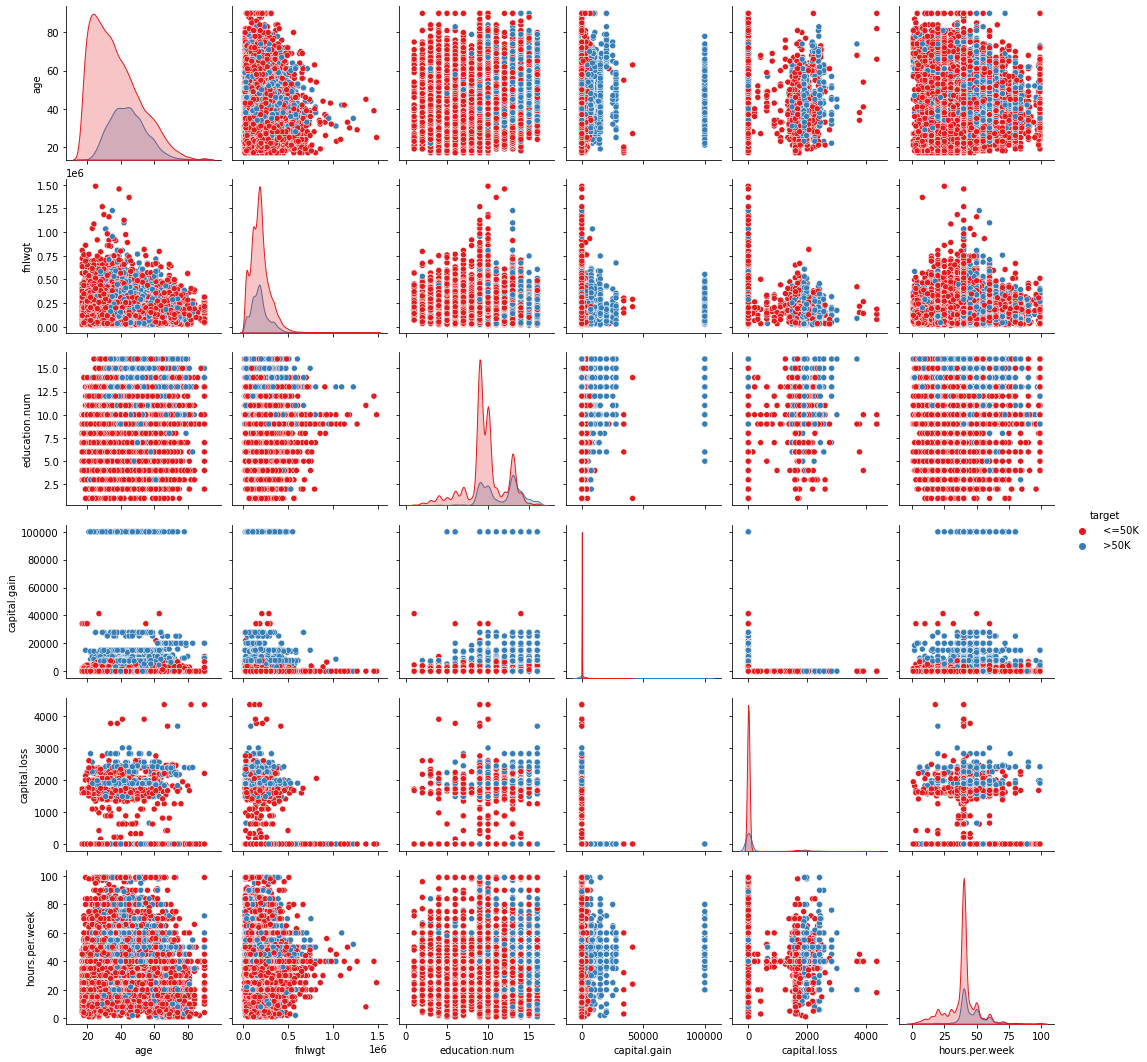

In [9]:
sns.pairplot(data_train,hue="target",palette="Set1")
plt.show()

<h3>Data Visualization</h3>

In [10]:
income_count = pd.DataFrame(data_train['target'].value_counts())
income_count['percentage'] = pd.DataFrame(data_train['target'].value_counts()/len(data_train)*100)
income_count

,target,percentage
<=50K,24720,75.919044
>50K,7841,24.080956


f:\pythonog\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='percentage'>

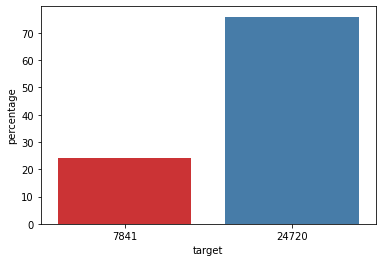

In [11]:
sns.barplot(income_count.target,income_count.percentage,palette='Set1')

<AxesSubplot:xlabel='occupation', ylabel='Percentage'>

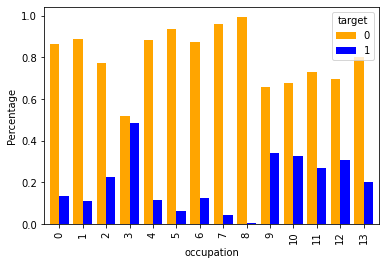

In [32]:
pd.crosstab([data_train.occupation],data_train.target, normalize='index').plot(kind='bar',width=0.8,color=['orange','blue'],ylabel="Percentage")

<h3>Model Fitting

In [12]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
 'hours_per_week', 'native_country', 'target']

numeric=data_train.select_dtypes(include=np.number)

non_numeric=data_train.select_dtypes(exclude=np.number)

In [13]:
#Numerising the categorical data
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for i in non_numeric.columns:
    for df in [data_train,data_test]:
        df[i] = le.fit_transform(df[i]);

for df in [data_train,data_test]:
    df = df.drop(['capital.gain','capital.loss'],axis=1,inplace=True)

In [14]:
data_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,target
0,39,6,77516,9,13,4,0,1,4,1,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,40,4,0


In [15]:
#Feature Selection
X_train = data_train.drop(['target'], axis=1)
y_train = data_train['target']
X_test = data_test.drop(['target'], axis=1)
y_test = data_test['target']

print("X_train and y_train:",X_train.shape,y_train.shape)
print("X_test and y_test:",X_test.shape,y_test.shape)

X_train and y_train: (32561, 12) (32561,)
X_test and y_test: (16281, 12) (16281,)


In [16]:
cols=X_train.columns.values
cols

array(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'hours.per.week', 'native.country'], dtype=object)

In [17]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [18]:
X_train = np.asarray(X_train,dtype=np.float)
y_train = np.asarray(y_train,dtype=np.float)
X_train.dtype

dtype('float64')

<h4>Logistic Regression

In [19]:
class logisticRegression:
    def __init__(self, lr=0.01, num_iter=100, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    #defining intercept for Hypothesis
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    #defining Sigmoid Func 
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #defining loss function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization for gradient descent
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
    
    #probability that classifies each inout to a particular category(0,1) 
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [20]:
model = logisticRegression(lr=0.1, num_iter=300000)

In [21]:
model.fit(X_train,y_train)

In [22]:
#predict
preds = model.predict(X_test)

In [23]:
model.theta

array([-1.20672803,  0.77462403, -0.08194968,  0.06084304,  0.04564355,
        1.06846652, -0.44178608, -0.03694185, -0.3448084 ,  0.11482556,
        0.9121854 ,  0.16163962,  0.00205887])

In [24]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print("Root Mean Square Error (RMSE)={:0.2f}.".format(rms))

Root Mean Square Error (RMSE)=0.44.


<h3>Confusion Matrix

<AxesSubplot:>

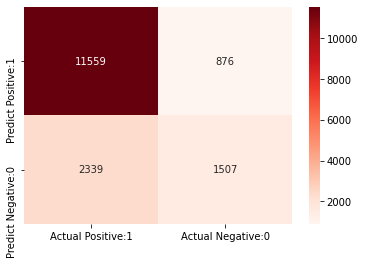

In [25]:
cm = confusion_matrix(y_test, preds)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     12435
           1       0.63      0.39      0.48      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.66      0.68     16281
weighted avg       0.78      0.80      0.78     16281

